In [15]:
import pandas as pd
import numpy as np
import sys

# Generate databases through the Regioinvent package

In [ ]:
# change the path here to wherever you stored the Regioinvent Python package
sys.path.append(r"C:\Users\mp_ma\OneDrive - polymtlus\Desktop\POST_DOC\Modules\Regioinvent\src")
import regioinvent

In [7]:
regio = regioinvent.Regioinvent(bw_project_name='metallican', ecoinvent_database_name='ecoinvent-3.10.1-cutoff', ecoinvent_version='3.10.1')

In [8]:
regio.spatialize_my_ecoinvent()

2025-07-14 15:11:13,032 - Regioinvent - INFO - Creating spatialized biosphere flows...
Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


Title: Writing activities to SQLite3 database:
  Started: 07/14/2025 15:11:14
  Finished: 07/14/2025 15:11:22
  Total time elapsed: 00:00:08
  CPU %: 97.20
  Memory %: 1.03


2025-07-14 15:20:19,745 - Regioinvent - INFO - Extracting ecoinvent to wurst...


Getting activity data


100%|██████████| 23523/23523 [00:00<00:00, 42630.04it/s]


Adding exchange data to activities


100%|██████████| 743409/743409 [00:54<00:00, 13578.31it/s]


Filling out exchange data


100%|██████████| 23523/23523 [00:04<00:00, 4724.39it/s]
2025-07-14 15:21:28,897 - Regioinvent - INFO - Spatializing ecoinvent...
Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:09


Title: Writing activities to SQLite3 database:
  Started: 07/14/2025 15:21:32
  Finished: 07/14/2025 15:22:42
  Total time elapsed: 00:01:09
  CPU %: 98.90
  Memory %: 19.84


In [9]:
regio.import_fully_regionalized_impact_method(lcia_method='all')

2025-07-14 15:25:57,213 - Regioinvent - INFO - Importing all available fully regionalized lcia methods for ecoinvent3.10.


In [10]:
regio.regionalize_ecoinvent_with_trade(trade_database_path=r'C:\Users\mp_ma\OneDrive - polymtlus\Desktop\POST_DOC\Modules\Regioinvent\trade_data.db',
                                       regioinvent_database_name='Regioinvent',
                                       cutoff=0.99)

2025-07-14 15:46:54,544 - Regioinvent - INFO - Extracting and formatting trade data...
2025-07-14 15:47:07,583 - Regioinvent - INFO - Regionalizing main inputs of internationally-traded products of ecoinvent...
100%|██████████| 1982/1982 [24:48<00:00,  1.33it/s] 
2025-07-14 16:11:56,165 - Regioinvent - INFO - Regionalizing main inputs of non-internationally traded processes of ecoinvent...
100%|██████████| 67/67 [28:58<00:00, 25.95s/it]
2025-07-14 16:40:54,749 - Regioinvent - INFO - Creating consumption markets for internationally-traded products...
100%|██████████| 1982/1982 [1:36:20<00:00,  2.92s/it]
2025-07-14 18:17:15,359 - Regioinvent - INFO - Link regioinvent processes to each other...
2025-07-14 18:17:53,244 - Regioinvent - INFO - Aggregate duplicates together...
2025-07-14 18:18:10,776 - Regioinvent - INFO - Regionalizing the elementary flows of the regioinvent database...
2025-07-14 18:18:19,705 - Regioinvent - INFO - Write regioinvent database to brightway...
Writing activiti

Title: Writing activities to SQLite3 database:
  Started: 07/14/2025 18:18:29
  Finished: 07/14/2025 18:27:43
  Total time elapsed: 00:09:14
  CPU %: 99.10
  Memory %: 29.34


2025-07-14 18:41:28,821 - Regioinvent - INFO - Connecting ecoinvent to regioinvent processes...


# Compare the results of the regionalized database with the original ecoinvent database

In [1]:
# Brightway imports
import bw2analyzer as ba
import bw2calc as bc
import bw2data as bd
import bw2io as bi
import brightway2 as bw

In [2]:
# Custom functions
from lca_functions import get_inventory_dataset, run_lca, compute_midpoint_contributions

In [3]:
BW_PROJECT = 'metallican' # insert your project name here
bd.projects.set_current(BW_PROJECT)
bd.databases

Databases dictionary with 5 object(s):
	Regioinvent
	biosphere3
	biosphere3_spatialized_flows
	ecoinvent-3.10.1-cutoff
	ecoinvent-3.10.1-cutoff regionalized

In [4]:
EI_DB = 'ecoinvent-3.10.1-cutoff'
RI_DB = 'Regioinvent'

In [12]:
iw_methods = [method for method in bd.methods if "impact world+" in " ".join(method).lower()]
iw_methods

[('IMPACT World+ v2.0.1, footprint version',
  'climate change',
  'carbon footprint'),
 ('IMPACT World+ v2.0.1, footprint version',
  'ecosystem quality',
  'remaining ecosystem quality damage'),
 ('IMPACT World+ v2.0.1, footprint version',
  'energy resources: non-renewable',
  'fossil and nuclear energy use'),
 ('IMPACT World+ v2.0.1, footprint version',
  'human health',
  'remaining human health damage'),
 ('IMPACT World+ v2.0.1, footprint version',
  'water use',
  'water scarcity footprint'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Climate change, ecosystem quality, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Climate change, ecosystem quality, short term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Human health',
  'Climate change, human health, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Human health',
  'Climate c

In [13]:
IMPACT_METHODS = {
'Total HH': ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10','Human health', 'Total human health'), 
'Total EQ': ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10','Ecosystem quality', 'Total ecosystem quality'), 
}

In [6]:
INVENTORIES_EI = {    
    "Gold": ("market for gold", "gold", "GLO"),
    "Silver": ("market for silver", "silver", "GLO"),
    "Copper": ("market for copper, cathode", "copper, cathode", 'GLO'),    
    "Cobalt": ("market for cobalt", "cobalt", "GLO"),
    "Nickel, class 1": ("market for nickel, class 1", "nickel, class 1", "GLO"),
    "Platinum": ("market for platinum group metal concentrate", "platinum group metal concentrate", "ZA"),
    "Uranium ore": ("market for uranium ore, as U", "uranium ore, as U", "GLO"),
    #"Iron ore concentrate": ("market for iron ore concentrate", "iron ore concentrate", "GLO")
}

In [7]:
INVENTORIES_RI = {
    "Gold": ("consumption market for gold", "gold", "CA"),
    "Silver": ("consumption market for silver", "silver", "CA"),
    "Copper": ("consumption market for copper, cathode", "copper, cathode", 'CA'),    
    "Cobalt": ("consumption market for cobalt", "cobalt", "CA"),
    "Nickel, class 1": ("consumption market for nickel, class 1", "nickel, class 1", "CA"),
    "Platinum concentrate": ("consumption market for platinum group metal concentrate", "platinum group metal concentrate", "CA"),
    "Uranium ore": ("consumption market for uranium ore, as U", "uranium ore, as U", "CA"),
    #"Iron ore concentrate": ("consumption market for iron ore concentrate", "iron ore concentrate", "CA") # No consumption market for Canada
}

In [8]:
INVENTORIES_EI_ds = get_inventory_dataset(INVENTORIES_EI, database_names=[EI_DB])
INVENTORIES_RI_ds = get_inventory_dataset(INVENTORIES_RI, database_names=[RI_DB])

In [16]:
df_ei = run_lca(INVENTORIES_EI_ds, amount=1, lcia_methods=IMPACT_METHODS)

In [17]:
df_ei

,Commodity,Total HH (DALY),Total EQ (PDF.m2.yr)
0,Gold,0.497926,92327.931786
1,Silver,0.004441,1114.697901
2,Copper,0.000234,37.530123
3,Cobalt,0.000834,58.126807
4,"Nickel, class 1",0.000346,67.916158
5,Platinum,0.000076,74.306990
6,Uranium ore,0.000248,92.674871


In [18]:
df_ri = run_lca(INVENTORIES_RI_ds, amount=1, lcia_methods=IMPACT_METHODS)

In [19]:
df_ri

,Commodity,Total HH (DALY),Total EQ (PDF.m2.yr)
0,Gold,0.391688,67931.392697
1,Silver,0.004311,1069.347909
2,Copper,0.000316,46.480044
3,Cobalt,0.000842,59.420517
4,"Nickel, class 1",0.000422,102.511136
5,Platinum concentrate,0.000041,69.930643
6,Uranium ore,0.000414,93.527894


In [ ]:
from visualisation_functions import heatmap_db_comparison

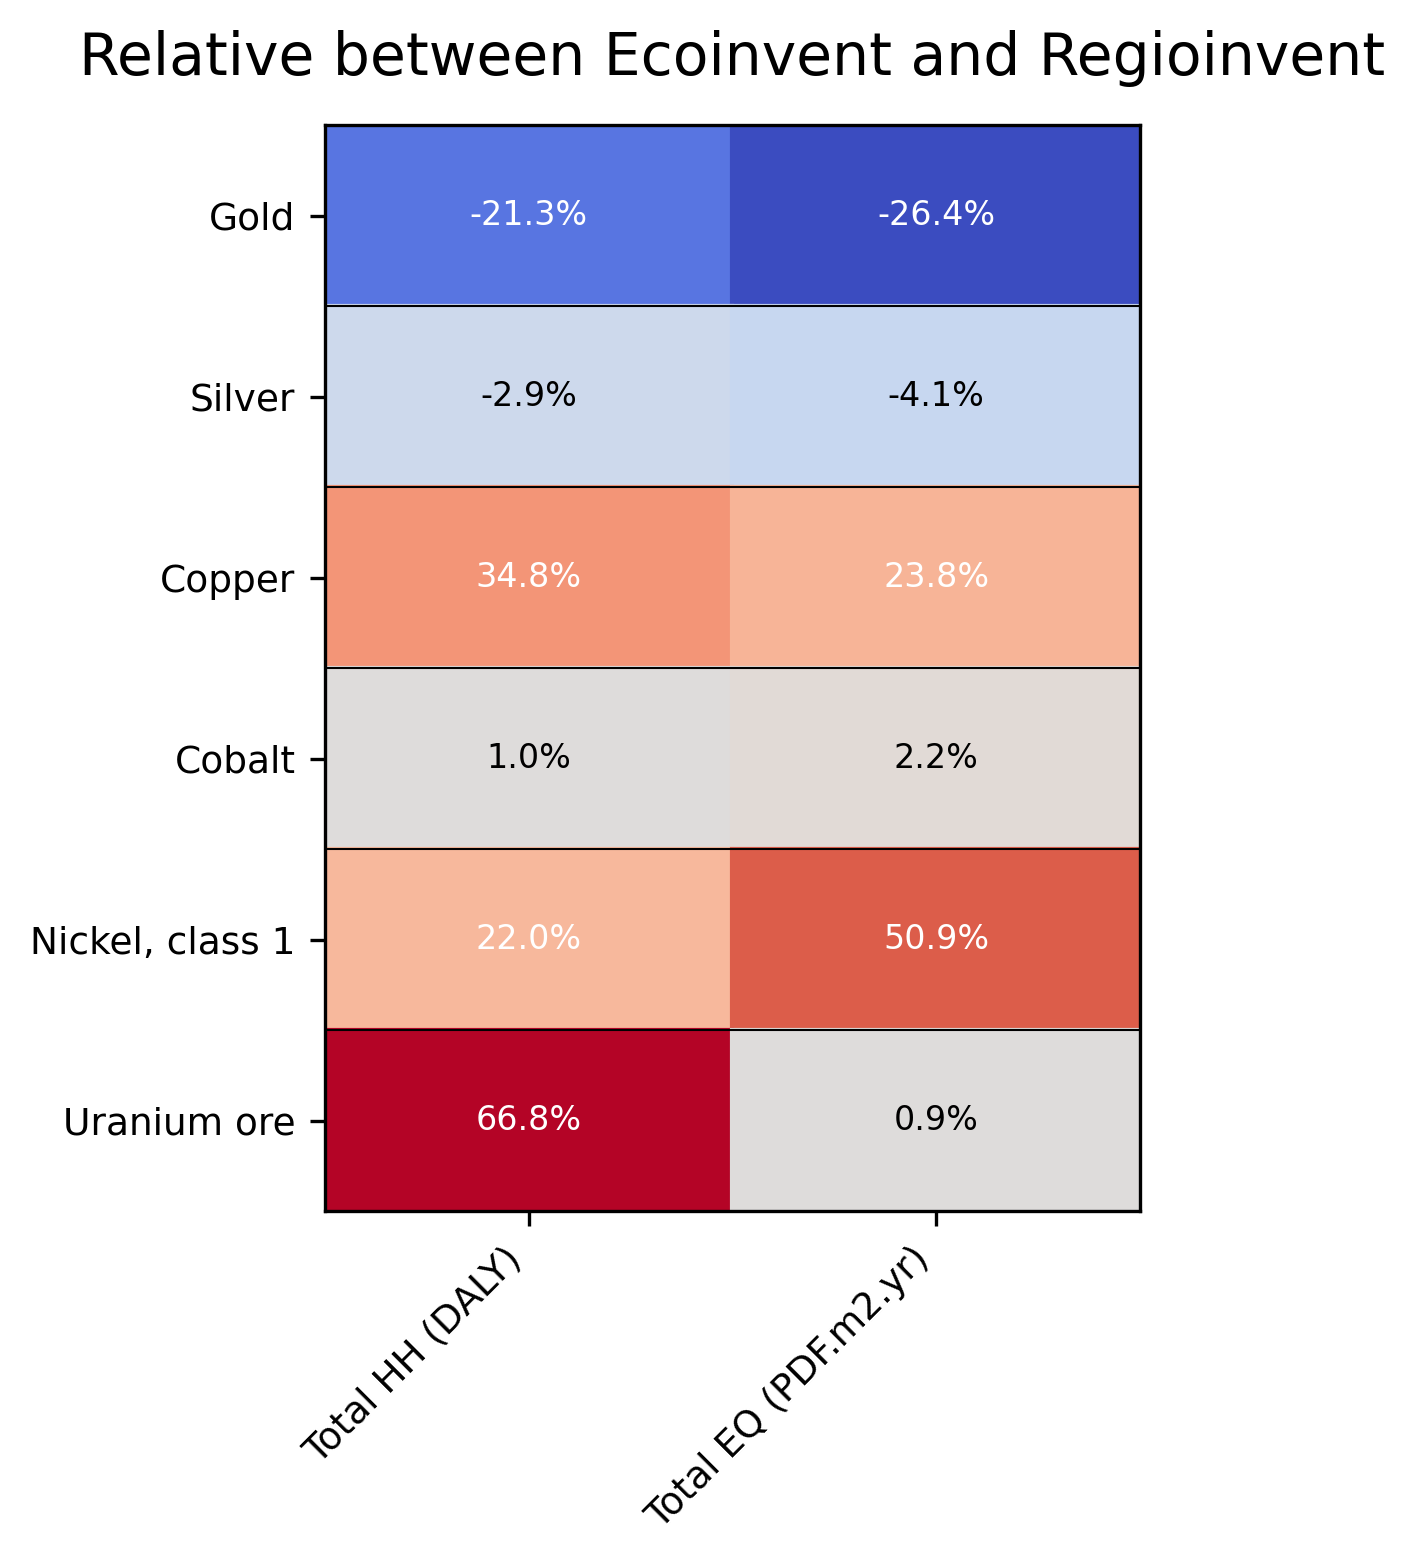

In [55]:
heatmap_db_comparison(
    df_ei, df_ri, 
    title="Relative between Ecoinvent and Regioinvent", 
    save_path=r'results/relative_difference_ei_ri.png'
)

# First tier and process contribution analysis

In [ ]:
from lca_functions import first_tier_contributions, process_contributions

In [ ]:
hh_endpoint = (
  "IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10",
  "Human health",
  "Total human health"
)

In [100]:
df_gold_first = first_tier_contributions(
     INVENTORIES_EI_ds['Gold'], 
    'Gold', 
    hh_endpoint
 )


In [101]:
df_gold_first

,Commodity,Activity,Product,Location,Impact_score,Share_%
0,Gold,gold refinery operation,gold,RoW,0.236020,47.400594
1,Gold,gold refinery operation,gold,ZA,0.078011,15.667117
2,Gold,silver-gold mine operation with refinery,gold,RoW,0.062389,12.529823
3,Gold,gold production,gold,AU,0.060708,12.192200
4,Gold,primary zinc production from concentrate,gold,RoW,0.018455,3.706376
5,Gold,gold-silver mine operation with refinery,gold,RoW,0.011734,2.356602
6,Gold,gold production,gold,US,0.010722,2.153341
7,Gold,processing of anode slime from electrorefining...,gold,GLO,0.005368,1.078014
8,Gold,gold production,gold,CA,0.005297,1.063906


In [97]:
# For Gold, top 8 full‐chain processes:
df_gold_proc = process_contributions(
    INVENTORIES_EI_ds["Gold"],
    "Gold",
    hh_endpoint,
    amount=1,
    threshold=0.01
)

In [98]:
df_gold_proc

,Commodity,Activity,Product,Location,Impact_score,Share_%
0,Gold,gold production,gold,AU,0.048204,9.681006
1,Gold,"electricity production, hard coal, conventional","electricity, high voltage",ZA,0.040861,8.206166
2,Gold,"electricity production, hard coal, at coal min...","electricity, high voltage, for internal use in...",CN,0.020487,4.114513
3,Gold,"diesel, burned in building machine","diesel, burned in building machine",GLO,0.020425,4.101939
4,Gold,"gold mine operation and gold production, unref...","gold, unrefined",RoW,0.019660,3.948302
5,Gold,"diesel, burned in diesel-electric generating s...","diesel, burned in diesel-electric generating s...",GLO,0.012285,2.467197
6,Gold,"electricity production, hard coal","electricity, high voltage",CN-NM,0.011135,2.236252
7,Gold,"electricity production, hard coal","electricity, high voltage",CN-SD,0.008534,1.713997
8,Gold,zinc mine operation,zinc concentrate,GLO,0.007488,1.503746
9,Gold,"electricity production, hard coal","electricity, high voltage",CN-XJ,0.006465,1.298315


# Midpoint contributions to endpoint damage

In [23]:
damage_method_version="IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10"
all_damage = [m for m in bw.methods
                  if m[0] == damage_method_version]

In [24]:
all_damage

[('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Climate change, ecosystem quality, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Climate change, ecosystem quality, short term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Human health',
  'Climate change, human health, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Human health',
  'Climate change, human health, short term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Fisheries impact'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Freshwater acidification'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Freshwater ecotoxicity, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Freshwater ecotoxicity, short

In [36]:
df_hh, df_eq = compute_midpoint_contributions(INVENTORIES_EI_ds, amount=1)

In [37]:
df_hh

,Commodity,"Climate change, human health, long term","Climate change, human health, short term","Human toxicity cancer, long term","Human toxicity cancer, short term","Human toxicity non-cancer, long term","Human toxicity non-cancer, short term","Ionizing radiations, human health",Ozone layer depletion,Particulate matter formation,"Photochemical ozone formation, human health","Water availability, human health"
0,Gold,0.506762,0.154692,0.005172,0.014022,0.146463,0.022452,0.000278,1.279120e-06,0.116051,0.000500,0.033605
1,Silver,0.536286,0.164990,0.001159,0.052882,0.047902,0.029805,0.000278,1.700083e-06,0.132123,0.000800,0.033774
2,Copper,0.149905,0.046245,0.009357,0.018042,0.325869,0.225600,0.000079,3.877257e-07,0.191967,0.000256,0.032679
3,Cobalt,0.285352,0.087815,0.001997,0.061024,0.068775,0.027762,0.000810,1.757672e-06,0.063357,0.000167,0.402938
4,"Nickel, class 1",0.261680,0.081137,0.002646,0.005302,0.026676,0.006928,0.000356,1.028309e-06,0.434340,0.000213,0.180721
5,Platinum,0.522948,0.159484,0.000868,0.002542,0.024889,0.005699,0.000069,7.447482e-07,0.260654,0.001918,0.020929
6,Uranium ore,0.521087,0.159654,0.000327,0.004410,0.014202,0.058265,0.080236,2.214168e-06,0.119468,0.001616,0.040732


In [38]:
df_eq

,Commodity,"Climate change, ecosystem quality, long term","Climate change, ecosystem quality, short term",Fisheries impact,Freshwater acidification,"Freshwater ecotoxicity, long term","Freshwater ecotoxicity, short term",Freshwater eutrophication,"Ionizing radiations, ecosystem quality","Land occupation, biodiversity",...,"Marine ecotoxicity, long term","Marine ecotoxicity, short term",Marine eutrophication,"Photochemical ozone formation, ecosystem quality",Terrestrial acidification,"Terrestrial ecotoxicity, long term","Terrestrial ecotoxicity, short term",Thermally polluted water,"Water availability, freshwater ecosystem","Water availability, terrestrial ecosystem"
0,Gold,0.202789,0.061902,8.146148e-20,0.006754,0.519509,0.018951,0.000021,1.008516e-10,0.020860,...,2.843041e-08,4.455095e-08,0.001032,0.026331,0.047728,0.001038,0.001626,0.000132,1.483784e-06,0.000229
1,Silver,0.158529,0.048772,7.007788e-20,0.006064,0.602933,0.014721,0.000024,7.471358e-11,0.020605,...,3.702652e-08,3.892884e-08,0.001266,0.031119,0.045189,0.001352,0.001421,0.000095,1.101588e-06,0.000022
2,Copper,0.069465,0.021430,9.015322e-20,0.025385,0.582013,0.009104,0.000020,3.831193e-11,0.017028,...,5.118624e-07,6.240154e-07,0.000757,0.015651,0.157101,0.018684,0.022777,0.000105,1.670881e-06,0.000012
3,Cobalt,0.303749,0.093477,3.328836e-19,0.014664,0.250939,0.031207,0.000864,1.163604e-09,0.021835,...,3.040505e-07,2.261988e-07,0.002125,0.023963,0.092301,0.011099,0.008256,0.000342,4.732596e-05,0.000121
4,"Nickel, class 1",0.098854,0.030651,8.533825e-20,0.053147,0.268923,0.017104,0.000219,1.812903e-10,0.005983,...,2.151757e-06,1.530786e-06,0.000675,0.010711,0.319368,0.078539,0.055874,0.000082,7.532861e-06,0.000031
5,Platinum,0.039495,0.012045,4.977058e-20,0.005103,0.822188,0.001173,0.000006,3.502354e-12,0.002407,...,4.154640e-09,7.430639e-09,0.000782,0.019060,0.038154,0.000152,0.000271,0.000003,1.744019e-07,0.000009
6,Uranium ore,0.103657,0.031759,2.356702e-20,0.004835,0.714376,0.005596,0.000008,2.419768e-12,0.005637,...,2.442369e-08,1.941695e-08,0.005756,0.042249,0.039313,0.000893,0.000709,0.000006,8.940137e-07,0.000003


In [50]:
df_hh.to_csv(r'results/human_health_midpoint_contributions.csv', index=False)
df_eq.to_csv(r'results/ecosystem_quality_midpoint_contributions.csv', index=False)

In [ ]:
from visualisation_functions import plot_midpoint_contributions

Plot saved to results/HH_MP_contributions.png


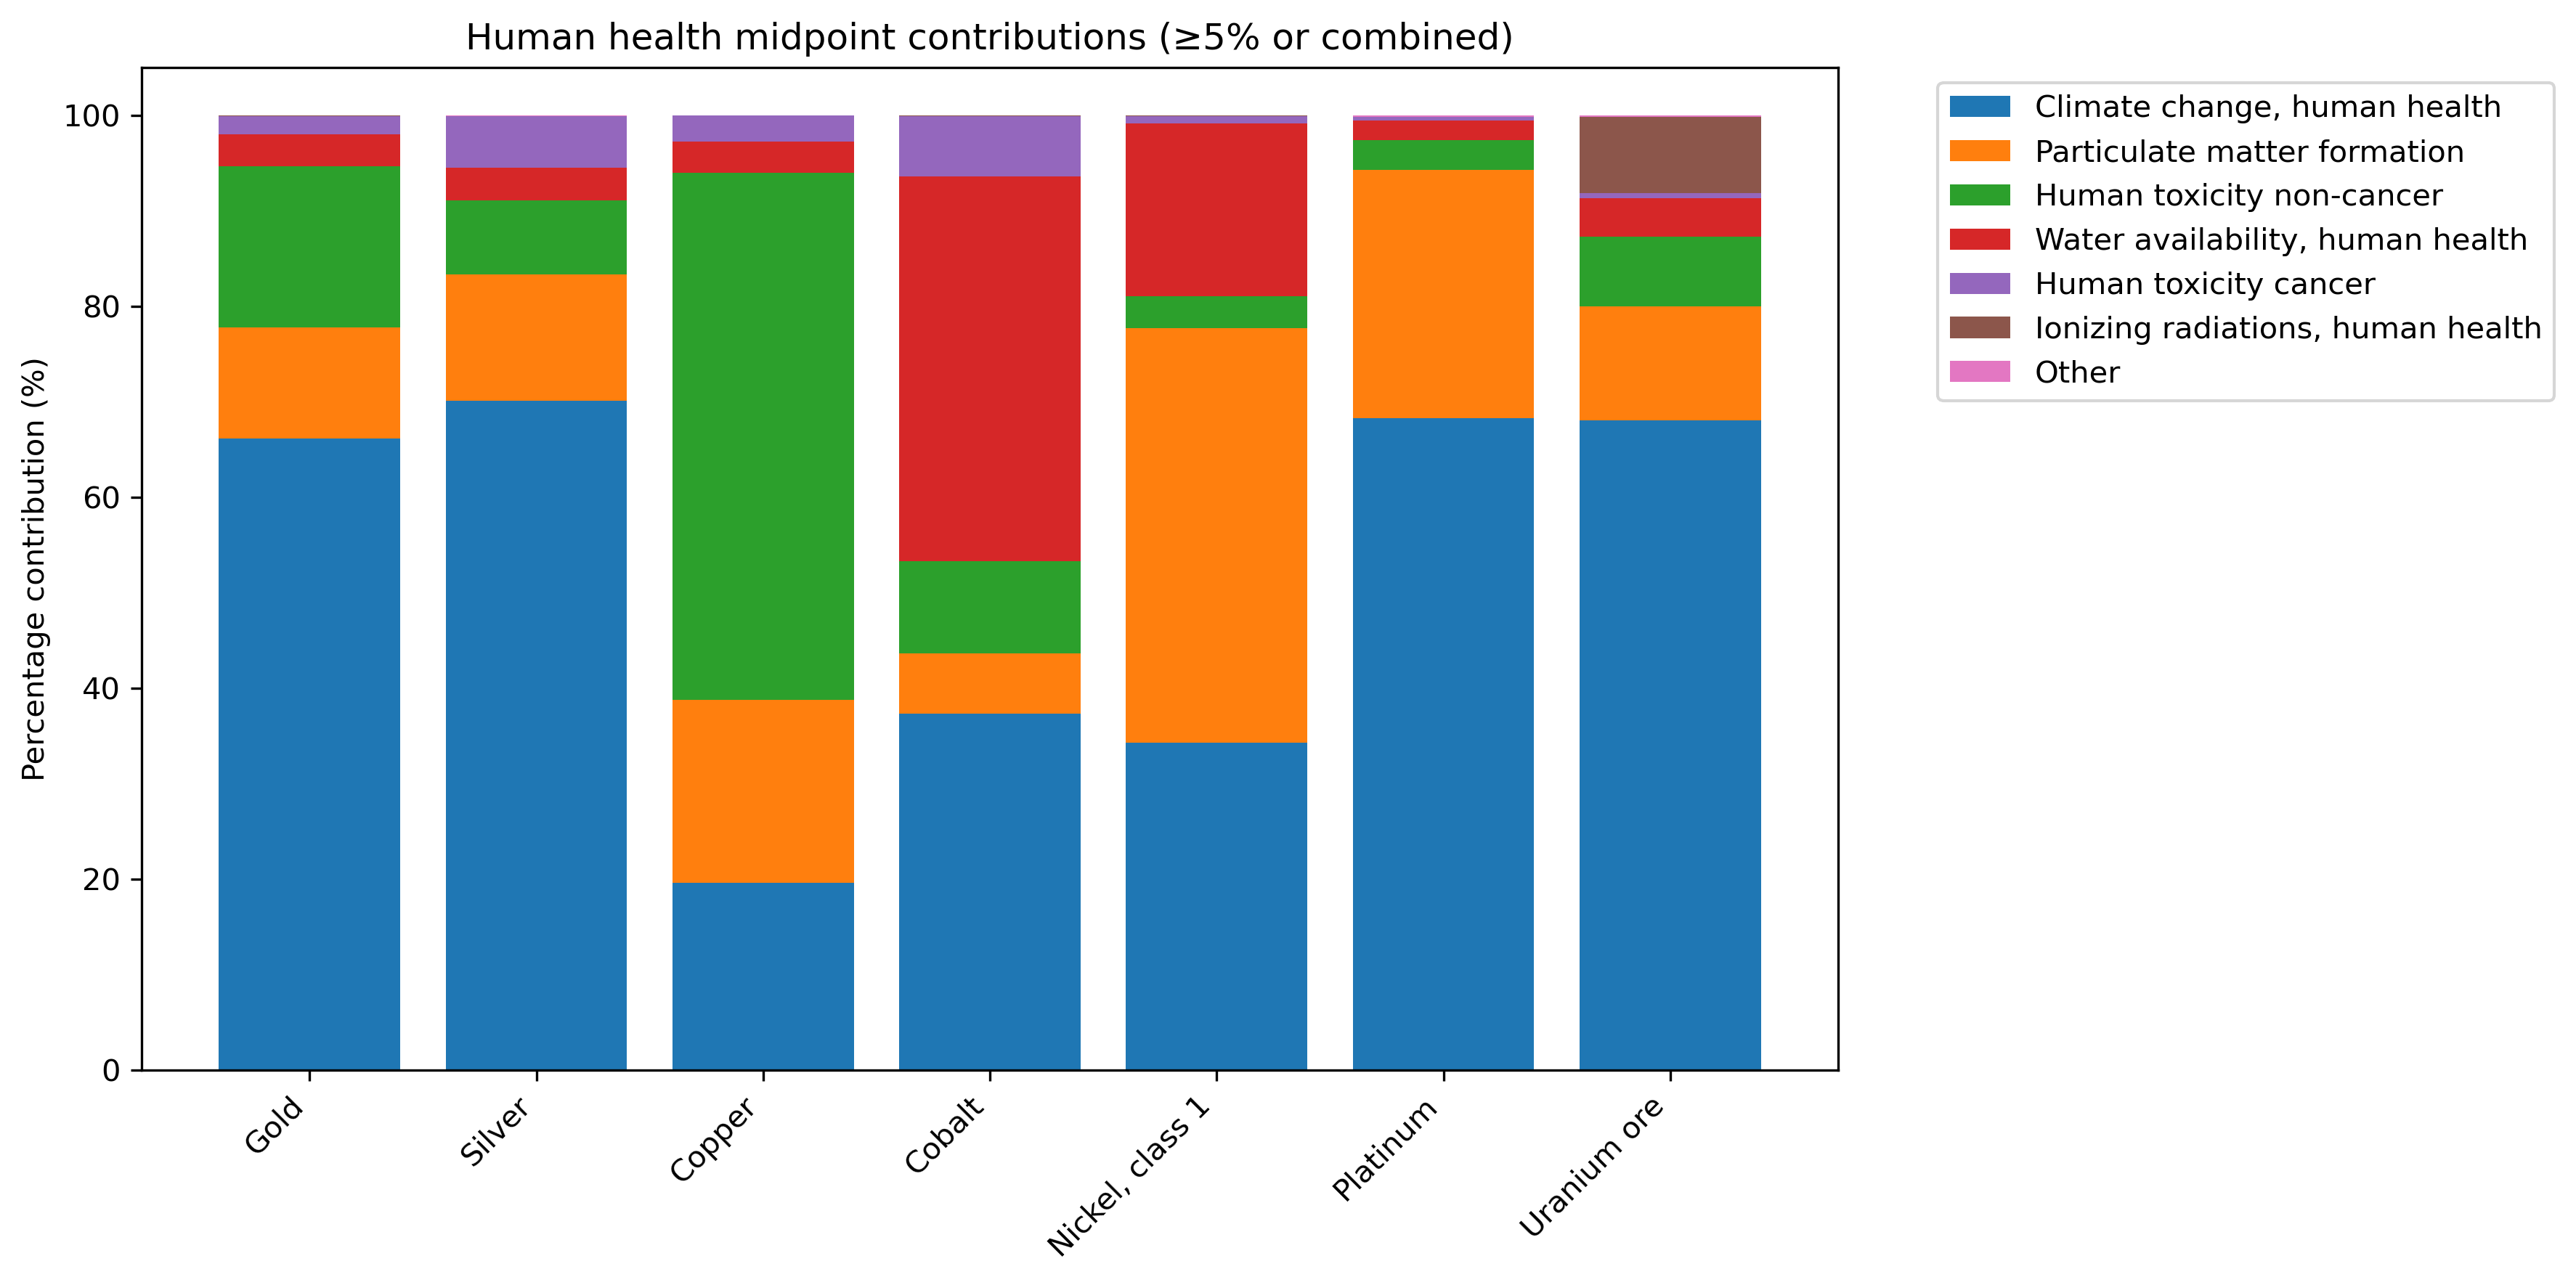

In [48]:
plot_midpoint_contributions(df_hh, 'Human health', save_path='results/HH_MP_contributions.png')

Plot saved to results/EQ_MP_contributions.png


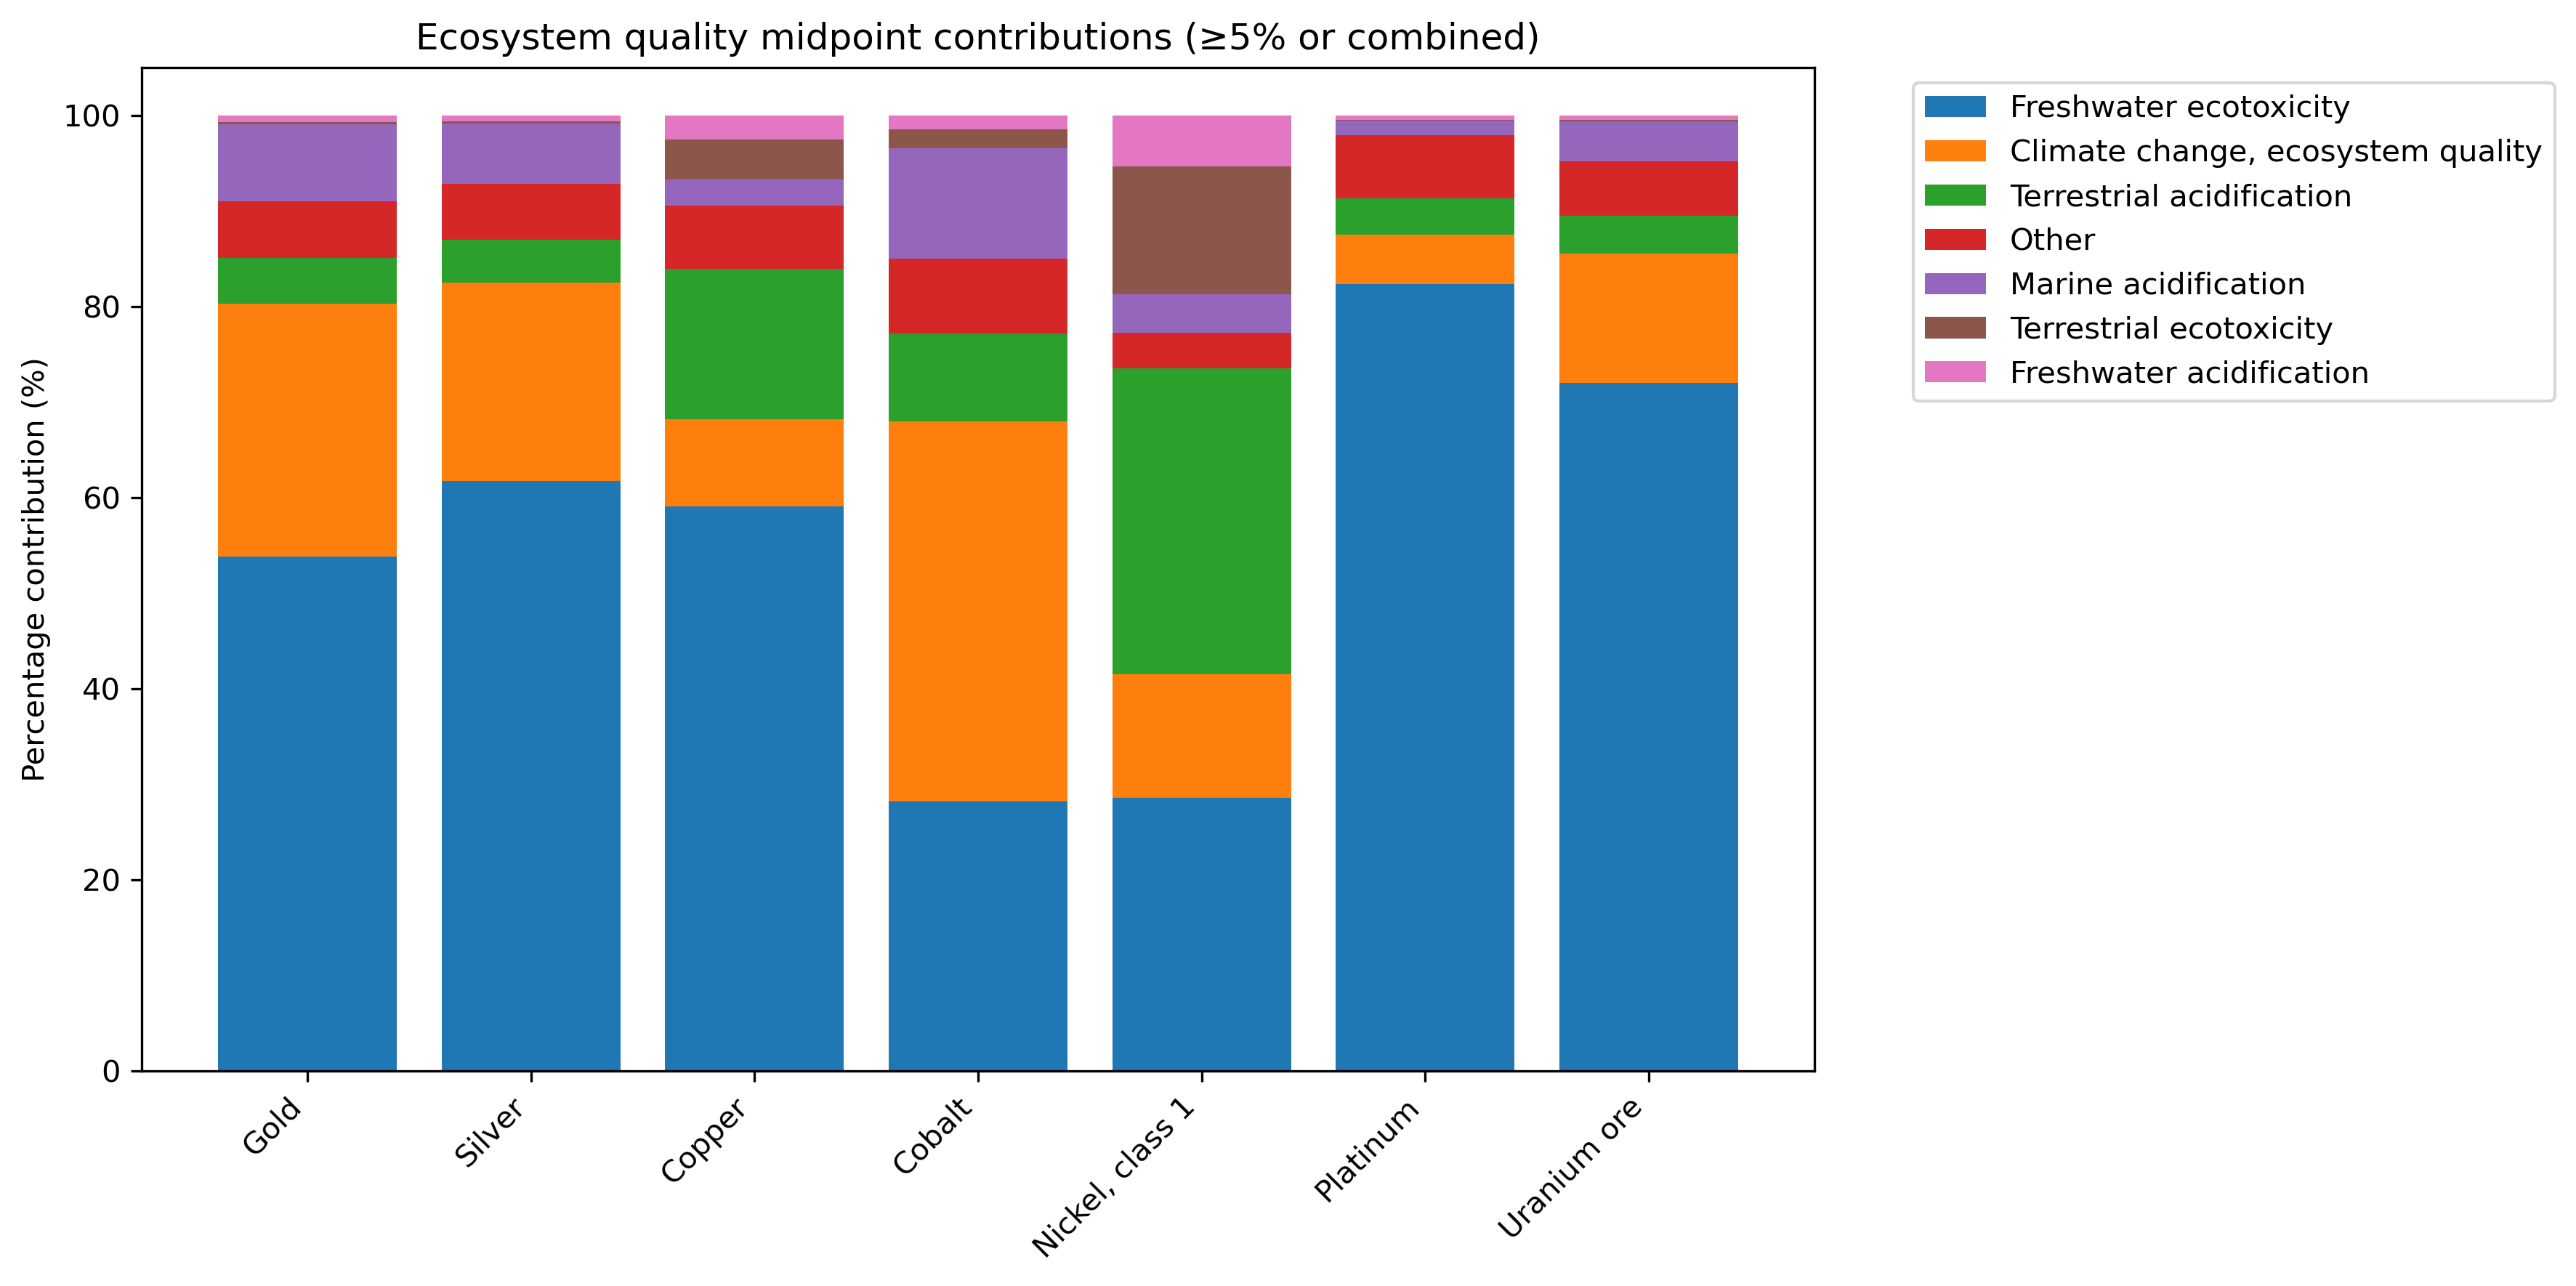

In [49]:
plot_midpoint_contributions(df_eq, 'Ecosystem quality', save_path='results/EQ_MP_contributions.png')